In [1]:
import matplotlib.pyplot as plt
import statistics
import math
import random

In [2]:
%matplotlib inline

In [173]:
class Game_state():
    
    def __init__(self, player):
        self.player = player
        self.turns = 1
        self.score = 0
        self.data = {}
    
    def game_loop(self):
        while self.turns <= 7:
            self.score += self.player.push()
            self.data[self.turns] = self.score
            self.turns += 1
        return self.data[7]
    

In [172]:
class Player():
    
    def __init__(self):
        pass
    
    def roll(self):
        roll = random.randint(1,6)
        if roll == 1:
            return 0
        else:
            return roll
    
    def push(self):
        roll_list = []
        while len(roll_list) < 1:
            roll_list.append(self.roll())
        return sum(roll_list)
    
    

            
        

In [169]:
class Push2player(Player):
    
    def __init__(self):
        super().__init__()
    
    def push(self):
        roll_list = []
        for _ in range(2):
            roll_list.append(self.roll())
        if 0 in roll_list:
            return 0
        else:
            return sum(roll_list)
            
class Push3player(Player):
    
    def __init__(self):
        super().__init__()
    
    def push(self):
        roll_list = []
        for _ in range(3):
            roll_list.append(self.roll())
        if 0 in roll_list:
            return 0
        else:
            return sum(roll_list)

In [185]:
def get_data(player,loops=100): # takes a instance of player
    simulations = []
    [simulations.append(Game_state(player).game_loop()) for _ in range(loops)]
    return simulations
        

In [186]:
data1 = get_data(Player(), 1000)
data2 =  get_data(Push2player(), 1000)
data3 = get_data(Push3player(), 1000)

In [177]:
print(data1)
print(data2)

[27, 22, 15, 27, 20, 24, 18, 24, 23, 28, 14, 22, 29, 23, 21, 25, 9, 32, 30, 25]
[53, 27, 20, 26, 30, 12, 54, 26, 57, 35, 42, 33, 41, 42, 24, 30, 50, 42, 32, 40]


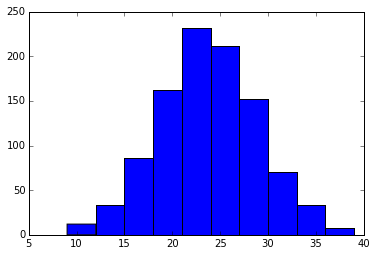

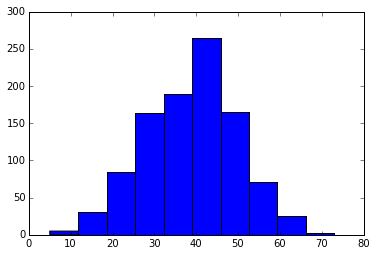

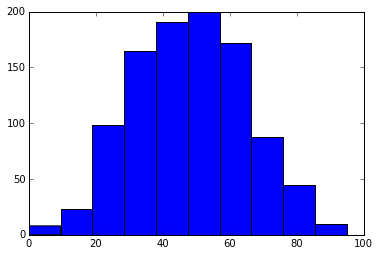

In [188]:
plt.hist(data1)
plt.show()
plt.hist(data2)
plt.show()
plt.hist(data3)
plt.show()

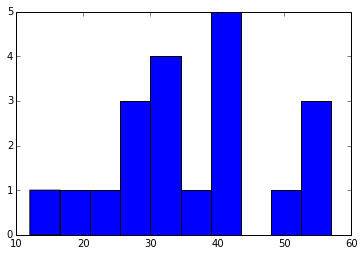

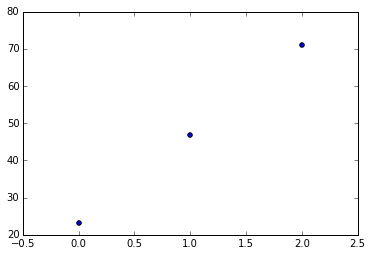

In [107]:
plt.scatter(range(3),[statistics.mean(data), statistics.mean(data2), statistics.mean(data3)])
plt.show()

In [120]:
list1 = [0,1,2,3,4]
if 0 in list1:
    print('hi')

hi
